In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import sinvchi2
import plot_tools

## Question 1

## Inference for normal mean and deviation (3 points)
A factory has a production line for manufacturing car windshields. A sample of windshields
has been taken for testing hardness. The observed hardness values y1 can be found in file
windshieldy1.txt. The data can also be accessed from the aaltobda R package as follows:

library(aaltobda)

data("windshieldy1")

head(windshieldy1)

 [1] 13.357 14.928 14.896 15.297 14.820 12.067
 
 
We may assume that the observations follow a normal distribution with an unknown standard
deviation σ. We wish to obtain information about the unknown average hardness µ. For simplicity
we assume standard uninformative prior discussed in the book, that is, p(µ, σ) ∝ σ−1
. 
It is not necessary to derive the posterior distribution in the report, as it has already been done in the book.
Below are test examples that can be used. The functions below can also be tested with markmyassignment.
Note! This is only a test case. You need to change to the full data windshieldy above when  reporting your results.

windshieldy_test <- c(13.357, 14.928, 14.896, 14.820)

In the report, formulate (1) model likelihood, (2) the prior, and (3) the resulting posterior.

a) What can you say about the unknown µ? Summarize your results using Bayesian point estimate
(i.e. E(µ|y)), a posterior interval (95%), and plot the density. A test example can be found
below for an uninformative prior. Note! Posterior intervals are also called credible intervals and
are different from confidence intervals.

mu_point_est(data = windshieldy_test)

 [1] 14.5
 
mu_interval(data = windshieldy_test, prob = 0.95)

 [1] 13.3 15.7
 
b) What can you say about the hardness of the next windshield coming from the production line
before actually measuring the hardness? Summarize your results using Bayesian point estimate,
a predictive interval (95%), and plot the density. A test example can be found below.

mu_pred_point_est(data = windshieldy_test)

 [1] 14.5
 
mu_pred_interval(data = windshieldy_test, prob = 0.95)

 [1] 11.8 17.2

## Data

In [3]:
#test data!
y =[13.357, 14.928, 14.896, 14.820]

### a)

In [4]:
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # here ddof=1 is used to get the sample estimate
my = np.mean(y)

In [5]:
my, s2

(14.50025, 0.5829495833333344)

In [6]:
tl1=[6,20]
t1 = np.linspace(tl1[0], tl1[1], 100)

# compute the exact marginal density for mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)

# compute the exact marginal density for mu for the filtered data
# pm_mu_pos = (
#     stats.t.pdf((t1 - my_pos) / np.sqrt(s2_pos/n_pos), n_pos-1) /
#     np.sqrt(s2_pos/n_pos)
# )

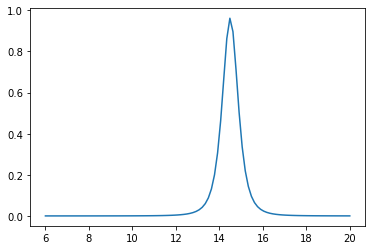

In [7]:
plt.plot(t1, pm_mu)

In [8]:
#mean
mean=round(t1[pm_mu.argmax()],1)
mean

14.5

In [9]:
#upper mean
lower=stats.t.ppf(0.025, mean, loc=mean, scale=s2)
upper=stats.t.ppf(0.975, mean, loc=mean, scale=s2)
round(lower, 1), round(upper, 1)

(13.3, 15.7)

### b)

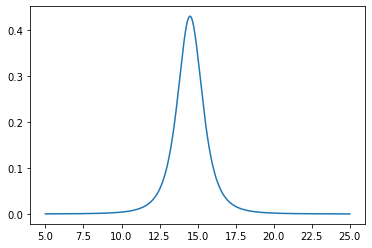

In [10]:
#estimate using pdf and turning into a grid
tlynew = [5, 25]
xynew = np.linspace(tlynew[0], tlynew[1], 10000)
line=stats.t.pdf((xynew-my)/np.sqrt(s2*(1+1/n)), n-1) / np.sqrt(s2*(1+1/n))
plt.plot(xynew, line)

In [11]:
#mean
mean_new=xynew[line.argmax()]
round(mean_new, 1)

14.5

In [12]:
#predictive intervals
line_norm=line/line.sum()
lower_new=xynew[(np.cumsum(line_norm)<0.025)][-1]
upper_new=xynew[(np.cumsum(line_norm)>0.975)][0]
round(lower_new, 1), round(upper_new, 1)

(11.8, 17.2)

## Question 2 Inference for the difference between proportions

An experiment was performed to estimate the effect of beta-blockers on mortality of cardiac patients. A group of patients was randomly assigned to treatment and control groups: out of 674 patients receiving the control, 39 died, and out of 680 receiving the treatment, 22 died. Assume that the outcomes are independent and binomially distributed, with probabilities of death of p0 and p1 under the control and treatment, respectively. Set up a noninformative or weakly informative prior distribution on (p0, p1).

In the report, formulate (1) model likelihood, (2) the prior, and (3) the resulting posterior.

a) Summarize the posterior distribution for the odds ratio, (p1/(1 − p1))/(p0/(1 − p0)). Compute the point estimate, a posterior interval (95%), and plot the histogram. Use Frank Harrell’s recommendations how to state results in Bayesian two group comparison. Below is a test case on how the odd ratio should be computed. Note! This is only a test case. You need to change to the real posteriors when reporting your results.

In [13]:
#experiment data created with R
p0_data=pd.read_csv('data/p0.csv')['x'].tolist()
p1_data=pd.read_csv('data/p1.csv')['x'].tolist()
len(p0_data), len(p1_data)

(100000, 100000)

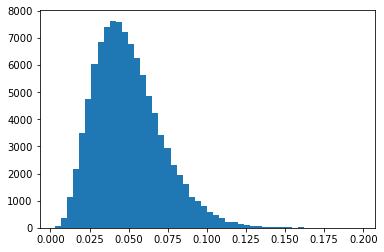

In [18]:
_,_,_=plt.hist(p0_data, bins=50)

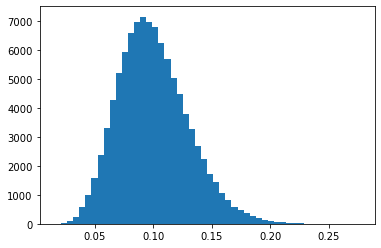

In [19]:
_,_,_=plt.hist(p1_data, bins=50)

In [20]:
#assignment data
treatment_all=680
treatment_d=22
treatment_l=treatment_all-treatment_d

no_treatment_all=674
no_treatment_d=39
no_treatment_l=no_treatment_all-no_treatment_d

In [21]:
#noninformative prior
alpha_pri=1
beta_pri=1

In [22]:
#posteriors
alpha_post_treat=alpha_pri+treatment_d
beta_post_treat=beta_pri+treatment_all-treatment_d
alpha_post_treat, beta_post_treat

(23, 659)

In [24]:
alpha_post_notreat=alpha_pri+no_treatment_d
beta_post_notreat=beta_pri+no_treatment_all-no_treatment_d
alpha_post_notreat, beta_post_notreat

(40, 636)

In [35]:
#generate samples from posteriors
post_samples_treat=stats.beta.rvs(alpha_post_treat, beta_post_treat, size=10000000)

In [36]:
post_samples_notreat=stats.beta.rvs(alpha_post_notreat, beta_post_notreat, size=10000000)

In [53]:
# from data
def odds_ratio(p0, p1):
    p0=np.array(p0)
    p1=np.array(p1)
    return (p1/(1 - p1))/(p0/(1 - p0))

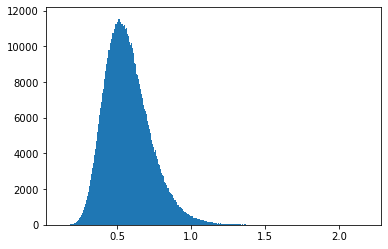

In [79]:
odds_ratio_orig=odds_ratio(post_samples_notreat, post_samples_treat)
_, bins_orig, dens_orig=plt.hist(odds_ratio_orig, bins=5000)
dens_orig=dens_orig.datavalues/dens_orig.datavalues.sum()

In [80]:
#<2.5% interval
low_interval=bins_orig[1:][(dens_orig.cumsum()<0.025)][-1]
low_interval

0.32083382395358473

In [81]:
#>97.5% interval
upper_interval=bins_orig[1:][(dens_orig.cumsum()>0.975)][0]
upper_interval

0.9259727248017404

In [127]:
#median
mean=np.mean(odds_ratio_orig)
mean

0.5700113615064413

In [83]:
np.median(odds_ratio_orig)

0.551318357999915

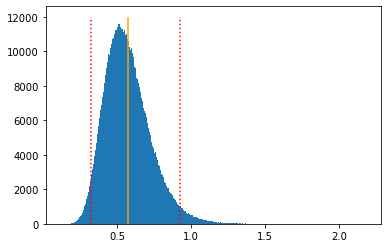

In [128]:
_,_, _=plt.hist(odds_ratio_orig, bins=5000)
plt.vlines(low_interval, ymin=0, ymax=12000, colors=['red'], linestyles ="dotted")
plt.vlines(upper_interval, ymin=0, ymax=12000, colors=['red'], linestyles ="dotted")
plt.vlines(mean, ymin=0, ymax=12000, colors=['orange'])

### test data

In [42]:
#test data odds ratio
odds_r0=odds_ratio(p0_data, p1_data)
odds_r1=odds_ratio(p1_data, p0_data)

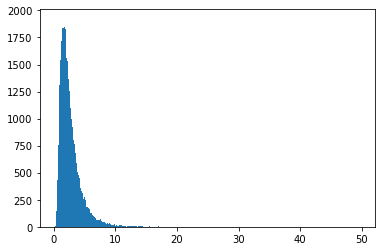

In [97]:
_, bins, dens=plt.hist(odds_r0, bins=1000)

In [106]:
np.median(odds_r0), np.mean(odds_r0)

(2.19110203634235, 2.6761463220977717)

In [99]:
np.median(odds_r1)

0.456391342538714

In [100]:
#normalize to get density that sum to 1
dens=dens.datavalues/dens.datavalues.sum()

In [101]:
#median
median_test=bins[1:][(dens.cumsum()<=0.5)][-1]
median_test

2.161365167826495

In [107]:
#mean
mean_test=np.mean(odds_r0)
mean_test

2.6761463220977717

In [113]:
lower_test=bins[1:][(dens.cumsum()<0.05)][-1]
lower_test

0.8285252912120592

In [114]:
upper_test=bins[1:][(dens.cumsum()>0.95)][0]
upper_test

6.061155917920584

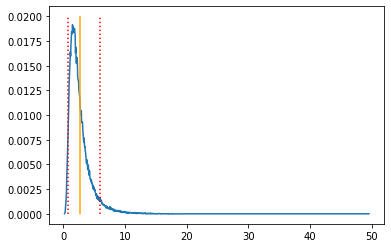

In [115]:
plt.plot(bins[1:], dens)
plt.vlines(lower_test, ymin=0, ymax=0.02, colors=['red'], linestyles ="dotted")
plt.vlines(upper_test, ymin=0, ymax=0.02, colors=['red'], linestyles ="dotted")
plt.vlines(mean_test, ymin=0, ymax=0.02, colors=['orange'])

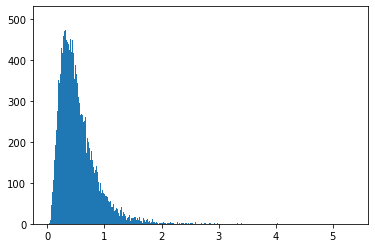

In [119]:
#odds ratio other way
_, bins1, dens1=plt.hist(odds_r1, bins=2000)

In [120]:
dens1=dens1.datavalues/dens1.datavalues.sum()

In [121]:
#mean
mean_test1=np.mean(odds_r1)
mean_test1

0.5307908553237887

In [122]:
#lower
lower_test1=bins1[1:][(dens1.cumsum()<0.05)][-1]
lower_test1

0.16418547506953873

In [123]:
#upper
upper_test1=bins1[1:][(dens1.cumsum()>0.95)][0]
upper_test1

1.1428816395793717

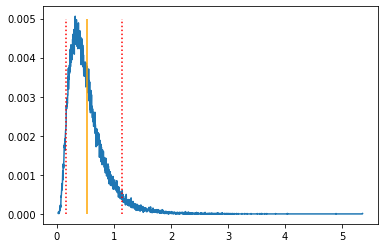

In [126]:
plt.plot(bins1[1:], dens1)
plt.vlines(lower_test1, ymin=0, ymax=0.005, colors=['red'], linestyles ="dotted")
plt.vlines(upper_test1, ymin=0, ymax=0.005, colors=['red'], linestyles ="dotted")
plt.vlines(mean_test1, ymin=0, ymax=0.005, colors=['orange'])

## Question 3 Inference for the difference between normal means

Consider a case where the same factory has two production lines for manufacturing car windshields. Independent samples from the two production lines were tested for hardness. The hardness measurements for the two samples y1 and y2 are given in the files windshieldy1.txt and windshieldy2.txt. These can be accessed directly with